In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from IPython.display import Image

poke = pd.read_csv('data/pokemon_alopez247.csv')

## Dataset Features
* **Number.** Pokémon ID in the Pokédex.
* **Name.** Name of the Pokémon.
* **Type_1.** Primary type.
* **Type_2.** Second type, in case the Pokémon has it.
* **Total.** Sum of all the base stats (Health Points, Attack, Defense, Special Attack, Special Defense, and Speed).
* **HP.** Base Health Points.
* **Attack.** Base Attack.
* **Defense.** Base Defense.
* **Sp_Atk.** Base Special Attack.
* **Sp_Def.** Base Special Defense.
* **Speed.** Base Speed.
* **Generation.** Number of the generation when the Pokémon was introduced.
* **isLegendary.** Boolean that indicates whether the Pokémon is Legendary or not.
* **Color.** Color of the Pokémon according to the Pokédex.
* **hasGender.** Boolean that indicates if the Pokémon can be classified as female or male.
* **Pr_male.** In case the Pokémon has Gender, the probability of its being male. The probability of being female is, of course, 1 minus this value.
* **Egg_Group_1.** Egg Group of the Pokémon.
* **Egg_Group_2.** Second Egg Group of the Pokémon, in case it has two.
* **hasMegaEvolution.** Boolean that indicates whether the Pokémon is able to Mega-evolve or not.
* **Height_m.** Height of the Pokémon, in meters.
* **Weight_kg.** Weight of the Pokémon, in kilograms.
* **Catch_Rate.** Catch Rate.
* **Body_Style.** Body Style of the Pokémon according to the Pokédex.

In [2]:
poke.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [3]:
poke.tail()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only
720,721,Volcanion,Fire,Water,600,80,110,120,130,90,...,Brown,False,NaN,Undiscovered,NaN,False,1.70,195.0,3,quadruped


In [4]:
poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
Number              721 non-null int64
Name                721 non-null object
Type_1              721 non-null object
Type_2              350 non-null object
Total               721 non-null int64
HP                  721 non-null int64
Attack              721 non-null int64
Defense             721 non-null int64
Sp_Atk              721 non-null int64
Sp_Def              721 non-null int64
Speed               721 non-null int64
Generation          721 non-null int64
isLegendary         721 non-null bool
Color               721 non-null object
hasGender           721 non-null bool
Pr_Male             644 non-null float64
Egg_Group_1         721 non-null object
Egg_Group_2         191 non-null object
hasMegaEvolution    721 non-null bool
Height_m            721 non-null float64
Weight_kg           721 non-null float64
Catch_Rate          721 non-null int64
Body_Style          721 non-

In [5]:
poke.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


## Missing Data

In [6]:
missing = pd.DataFrame({'qtd_NaN_data':poke.isna().sum(), 
                        'perc_NaN_data':round((poke.isna().sum()*100/poke.shape[0]), 2)})
missing

,qtd_NaN_data,perc_NaN_data
Number,0,0.00
Name,0,0.00
Type_1,0,0.00
Type_2,371,51.46
Total,0,0.00
HP,0,0.00
Attack,0,0.00
Defense,0,0.00
Sp_Atk,0,0.00
Sp_Def,0,0.00


In [7]:
# Data when 'Pr_Male' is NaN
poke[poke['Pr_Male'].isna()].head(5)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
80,81,Magnemite,Electric,Steel,325,25,35,70,95,55,...,Grey,False,NaN,Mineral,NaN,False,0.30,6.0,190,head_arms
81,82,Magneton,Electric,Steel,465,50,60,95,120,70,...,Grey,False,NaN,Mineral,NaN,False,0.99,60.0,60,multiple_bodies
99,100,Voltorb,Electric,NaN,330,40,30,50,55,55,...,Red,False,NaN,Mineral,NaN,False,0.51,10.4,190,head_only
100,101,Electrode,Electric,NaN,480,60,50,70,80,80,...,Red,False,NaN,Mineral,NaN,False,1.19,66.6,60,head_only
119,120,Staryu,Water,NaN,340,30,45,55,70,55,...,Brown,False,NaN,Water_3,NaN,False,0.79,34.5,225,head_base


In [8]:
print('Without Pr Male:{} - Has gender False:{}'.format(
    poke['Number'][poke['Pr_Male'].isna()].count(),
    poke['Number'][poke['hasGender'] == False].count()))

print('Is Legendary :{} - Has gender False:{}'.format(
    poke['Number'][poke['isLegendary'] == True].count(),
    poke['Number'][(poke['hasGender'] == False) & (poke['isLegendary'] == True)].count()))

Without Pr Male:77 - Has gender False:77
Is Legendary :46 - Has gender False:40


In [9]:
print('**   Legendary pokemons with gender  **')
print()
poke[(poke['hasGender'] == True) & (poke['isLegendary'] == True)]

**   Legendary pokemons with gender  **



,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
379,380,Latias,Dragon,Psychic,600,80,80,90,110,130,...,Red,True,0.0,Undiscovered,NaN,True,1.40,40.0,3,two_wings
380,381,Latios,Dragon,Psychic,600,80,90,80,130,110,...,Blue,True,1.0,Undiscovered,NaN,True,2.01,60.0,3,two_wings
484,485,Heatran,Fire,Steel,600,91,90,106,130,106,...,Brown,True,0.5,Undiscovered,NaN,False,1.70,430.0,3,quadruped
640,641,Tornadus,Flying,NaN,580,79,115,70,125,80,...,Green,True,1.0,Undiscovered,NaN,False,1.50,63.0,3,head_arms
641,642,Thundurus,Electric,Flying,580,79,115,70,125,80,...,Blue,True,1.0,Undiscovered,NaN,False,1.50,61.0,3,head_arms
644,645,Landorus,Ground,Flying,600,89,125,90,115,80,...,Brown,True,1.0,Undiscovered,NaN,False,1.50,68.0,3,head_arms


**Type_1** and **Egg_Group_2** are a lot of NaN data because many pokemons are only one type and one egg group.

10 percent are **Pr_Male** NaN because 77 pokemons has no gender and if these, 40 are Legendary of 46 Legendaries.

## Categorical features analysis

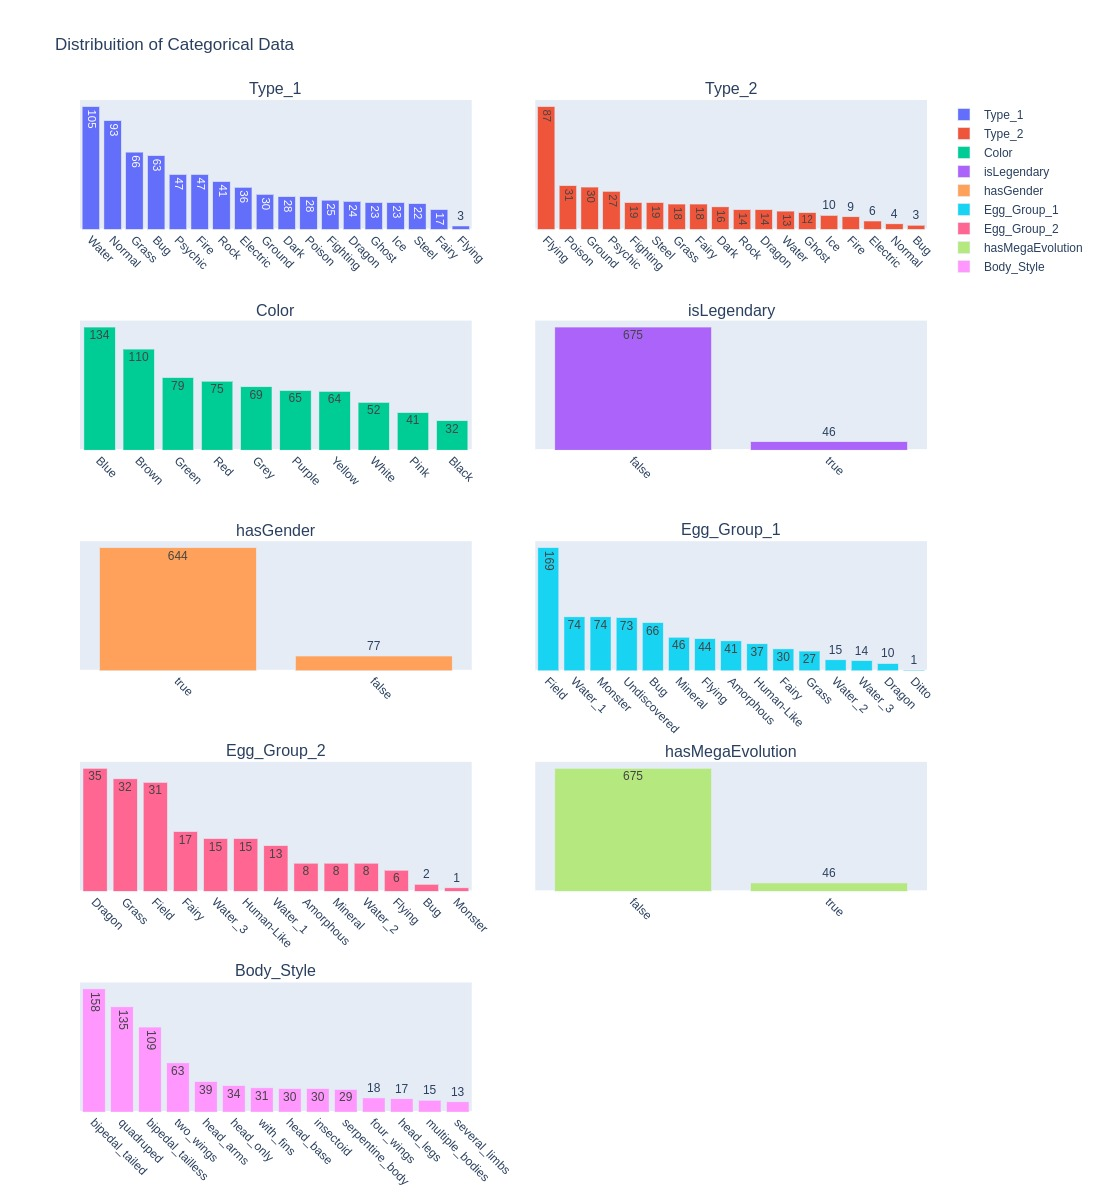

In [11]:
cat_feat = ['Type_1', 'Type_2', 'Color', 'isLegendary', 
              'hasGender', 'Egg_Group_1', 'Egg_Group_2', 
              'hasMegaEvolution', 'Body_Style']

subplot_titles=[]
fig = make_subplots(rows=5,cols=2,
                    vertical_spacing=0.09,
                    horizontal_spacing=0.075,
                    subplot_titles=cat_feat)

for enu, c in enumerate(cat_feat):
    # total values
    status_values = poke[c].value_counts().to_frame()
    # plot distribuition
    trace = go.Bar(x=status_values.index, 
                   y=status_values[c], 
                   text=status_values[c], 
                   textposition='auto',
                   name=c
                  )
    
    row=int(np.ceil((enu+1)/2))
    col=(enu % 2)+1
    fig.append_trace(trace, row=row, col=col)
    fig.update_xaxes(tickangle = 45)
    fig.update_yaxes(showgrid = False,showticklabels = False)
    
fig.update_layout(title_text='Distribuition of Categorical Data', 
                  height=1200, width=1100)

img = fig.to_image(format='jpg')
Image(img)
#fig.show()

## Numerical features distribution

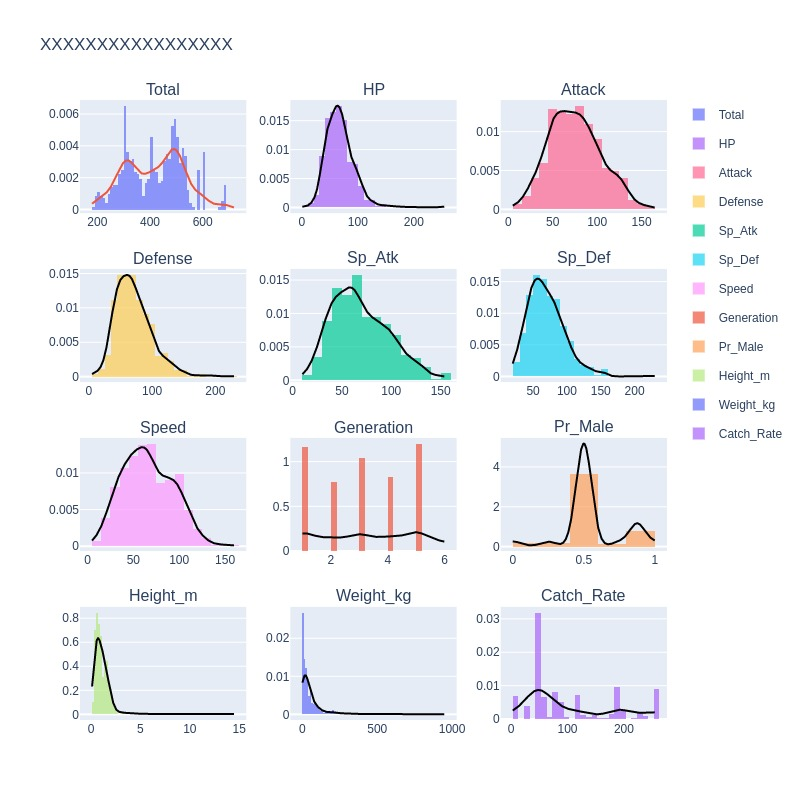

In [12]:
num_feat = ['Total','HP','Attack','Defense','Sp_Atk','Sp_Def',
'Speed','Generation','Pr_Male','Height_m','Weight_kg','Catch_Rate']

sub_fig = make_subplots(rows=int(np.ceil((len(num_feat))/3)),
                        cols=3, 
                        vertical_spacing=0.09,
                        horizontal_spacing=0.075,
                        subplot_titles=num_feat)
sub_fig.update_layout(title='XXXXXXXXXXXXXXXXX', height=800, width=800)
#sub_fig.layout['annotations'] = list()
anno = []

for enu, i in enumerate(num_feat):
    
    row=int(np.ceil((enu+1)/3))
    col=(enu % 3)+1
    
    if i == 'Pr_Male' or i == 'Height_m' or i == 'Generation':
        fig = ff.create_distplot(hist_data=[poke[i].dropna()], 
                                 group_labels=[i],
                                 bin_size=[.2], colors=[enu])
    else:
        fig = ff.create_distplot(hist_data=[poke[i].dropna()], 
                                 group_labels=[i],
                                 bin_size=[10], colors=[enu])    
    for mydata in fig['data']:
        sub_fig.append_trace(mydata, row, col)
        


# To print image
img_bytes = sub_fig.to_image(format="jpeg")
Image(img_bytes)

#sub_fig.show()

## Correlations Analysis

In [13]:
correlations = poke.corr(method='pearson')
correlations

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,Pr_Male,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate
Number,1.000000,0.160370,0.107512,0.138104,0.121401,0.120161,0.111822,0.028156,0.983329,0.135022,-0.100328,-0.013414,-0.117981,-0.009710,0.087309,-0.074931
Total,0.160370,1.000000,0.642628,0.704164,0.605831,0.723737,0.706501,0.548890,0.092868,0.481837,-0.385978,0.113564,0.228503,0.526813,0.535966,-0.738280
HP,0.107512,0.642628,1.000000,0.431680,0.228834,0.368640,0.376006,0.170031,0.071545,0.258926,-0.155031,-0.066704,0.093708,0.442872,0.431320,-0.478725
Attack,0.138104,0.704164,0.431680,1.000000,0.433233,0.335205,0.207211,0.335013,0.093857,0.302786,-0.196892,0.213882,0.203840,0.408590,0.469395,-0.525106
Defense,0.121401,0.605831,0.228834,0.433233,1.000000,0.202519,0.483986,-0.008663,0.068409,0.274446,-0.269466,0.063899,0.122666,0.354205,0.476983,-0.436558
Sp_Atk,0.120161,0.723737,0.368640,0.335205,0.202519,1.000000,0.492861,0.443106,0.069689,0.409739,-0.336579,0.105893,0.175581,0.330579,0.285048,-0.539114
Sp_Def,0.111822,0.706501,0.376006,0.207211,0.483986,0.492861,1.000000,0.233487,0.055421,0.360215,-0.337265,0.017941,0.149796,0.313196,0.328645,-0.513014
Speed,0.028156,0.548890,0.170031,0.335013,-0.008663,0.443106,0.233487,1.000000,0.003920,0.286082,-0.216964,0.070098,0.147844,0.224617,0.108637,-0.410557
Generation,0.983329,0.092868,0.071545,0.093857,0.068409,0.069689,0.055421,0.003920,1.000000,0.071875,-0.029916,0.010912,-0.125374,-0.051304,0.034003,-0.025227
isLegendary,0.135022,0.481837,0.258926,0.302786,0.274446,0.409739,0.360215,0.286082,0.071875,1.000000,-0.644714,0.095428,0.047955,0.326323,0.425219,-0.319302


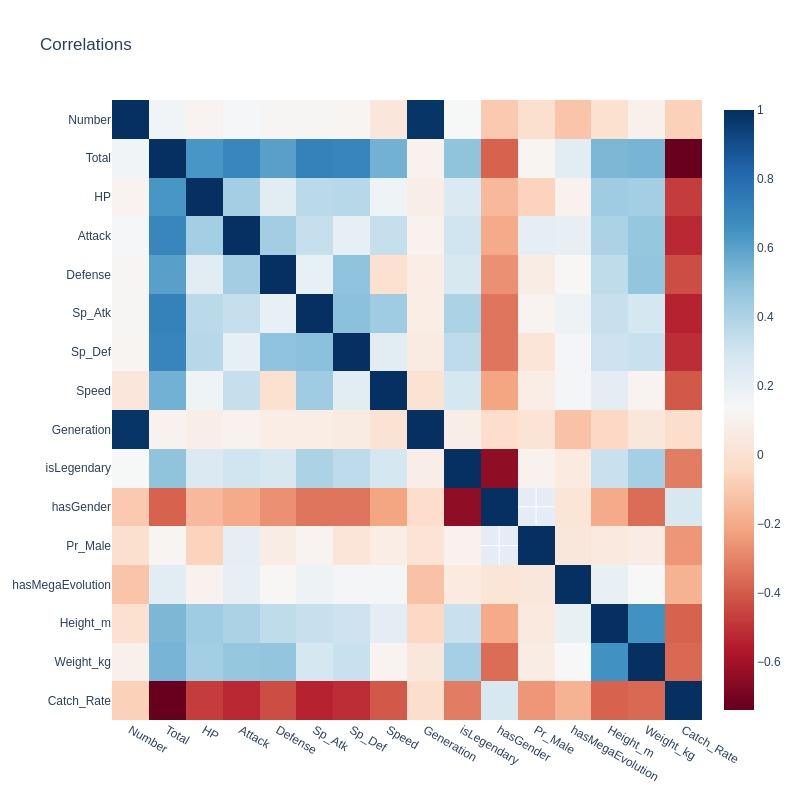

In [15]:
data = [go.Heatmap(x=correlations.columns,
                   y=correlations.index,
                   z=correlations, colorscale='RdBu')]
layout = go.Layout(title='Correlations',
                   yaxis={'autorange':"reversed"})

fig = go.Figure(data=data,layout=layout)
fig.update_layout(autosize=False, height=800, width=800)
# To save image file
# fig.write_image("images/correlations.jpeg")

# To print image
img_bytes = fig.to_image(format="jpeg")
Image(img_bytes)

# To print plotly graph
#fig.show()

In [16]:
import plotly.express as px
import plotly.offline as pyo

fig = px.scatter_matrix(poke, dimensions=['Catch_Rate', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed'])
fig.update_layout(height=1000, width=1000)
pyo.plot(fig)

'temp-plot.html'

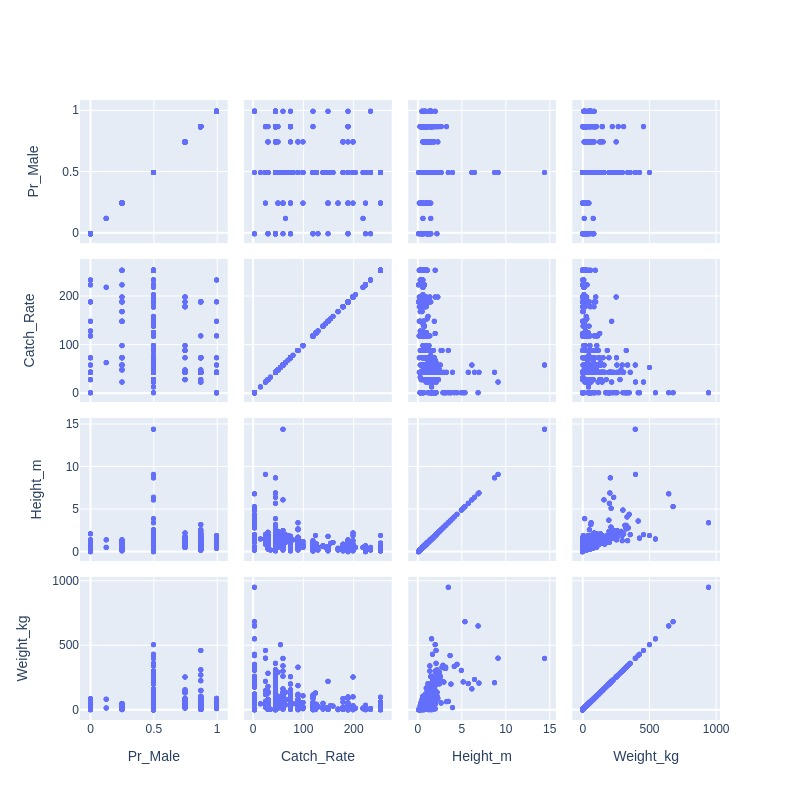

In [17]:
d_list = ['Pr_Male', 'Catch_Rate', 'Height_m', 'Weight_kg']#['Catch_Rate', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
dimensions = []

for d in d_list:
    dimensions.append(dict(label=d, values=poke[d]))

data = go.Splom(dimensions=dimensions, 
                showupperhalf=True,
                marker = dict(size=5, showscale=False,))
fig = go.Figure(data=data)
fig.update_layout(height=800, width= 800)
Image(fig.to_image('jpg'))

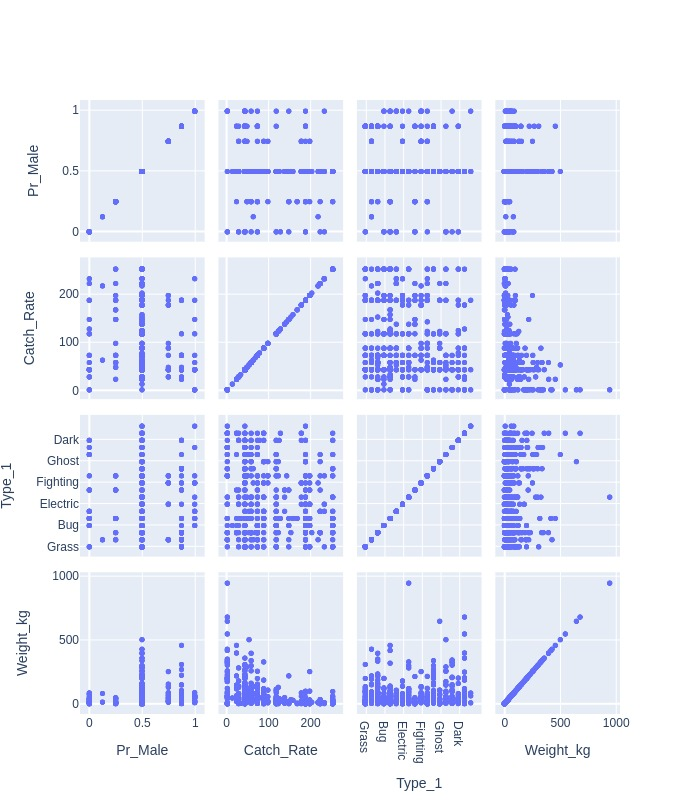

In [20]:
d_list = ['Pr_Male', 'Catch_Rate', 'Type_1', 'Weight_kg']#['Catch_Rate', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
dimensions = []

for d in d_list:
    dimensions.append(dict(label=d, values=poke[d], visible=True))

data = go.Splom(dimensions=dimensions, marker = dict(size=5, showscale=False,))
fig = go.Figure(data=data)
fig.update_layout(height=800)
Image(fig.to_image('jpg'))